In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
# CD into root of your homework2 part3 directory
%cd '/gdrive/MyDrive/CSE512/Project/Electricity'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/CSE512/Project/Electricity


In [ ]:
df_all = pd.read_csv("continuous dataset.csv", parse_dates = ['datetime'], index_col = ['datetime'])

In [ ]:
df_all.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [ ]:
df_all.tail()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1
2020-06-27 00:00:00,1013.5683,26.750330,0.020441,0.063965,10.198346,25.125330,0.019281,0.100189,2.785751,23.562830,0.018404,0.162598,3.286878,0,0,1


In [ ]:
df_all.shape

(48048, 16)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48048 entries, 2015-01-03 01:00:00 to 2020-06-27 00:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  48048 non-null  float64
 1   T2M_toc     48048 non-null  float64
 2   QV2M_toc    48048 non-null  float64
 3   TQL_toc     48048 non-null  float64
 4   W2M_toc     48048 non-null  float64
 5   T2M_san     48048 non-null  float64
 6   QV2M_san    48048 non-null  float64
 7   TQL_san     48048 non-null  float64
 8   W2M_san     48048 non-null  float64
 9   T2M_dav     48048 non-null  float64
 10  QV2M_dav    48048 non-null  float64
 11  TQL_dav     48048 non-null  float64
 12  W2M_dav     48048 non-null  float64
 13  Holiday_ID  48048 non-null  int64  
 14  holiday     48048 non-null  int64  
 15  school      48048 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 6.2 MB


In [ ]:
df = df_all['nat_demand'].resample('W').sum()
df = df[1:-2]            #Removing pandemic effects
df

datetime
2015-01-11    181919.6224
2015-01-18    188082.3152
2015-01-25    179448.7184
2015-02-01    184393.4256
2015-02-08    187290.1846
                 ...     
2020-05-17    185660.2768
2020-05-24    182654.8688
2020-05-31    179611.6882
2020-06-07    186387.8551
2020-06-14    181982.0019
Freq: W-SUN, Name: nat_demand, Length: 284, dtype: float64

<Axes: xlabel='datetime'>

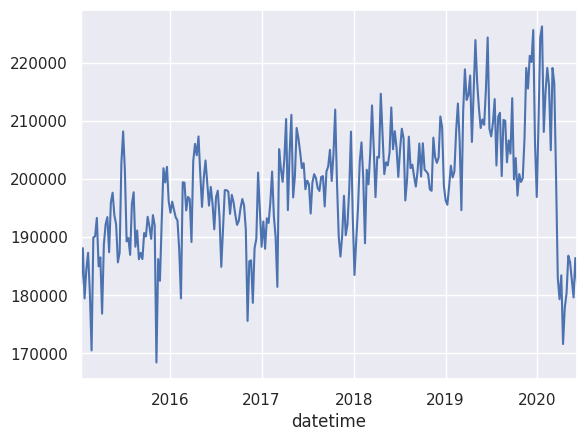

In [ ]:
df.plot()

In [ ]:
# df_norm = (df - df.min()) / (df.max() - df.min())
# df_norm.std()

0.17806965758166385

In [ ]:
# df.std()

10288.718833563253

In [ ]:
df = df.to_frame()
df

,nat_demand
datetime,
2015-01-11,181919.6224
2015-01-18,188082.3152
2015-01-25,179448.7184
2015-02-01,184393.4256
2015-02-08,187290.1846
...,...
2020-05-17,185660.2768
2020-05-24,182654.8688
2020-05-31,179611.6882


Epoch 1/50
220/220 - 6s - loss: 0.0409 - 6s/epoch - 28ms/step
Epoch 2/50
220/220 - 1s - loss: 0.0134 - 1s/epoch - 6ms/step
Epoch 3/50
220/220 - 1s - loss: 0.0138 - 1s/epoch - 6ms/step
Epoch 4/50
220/220 - 1s - loss: 0.0135 - 817ms/epoch - 4ms/step
Epoch 5/50
220/220 - 1s - loss: 0.0136 - 817ms/epoch - 4ms/step
Epoch 6/50
220/220 - 1s - loss: 0.0134 - 821ms/epoch - 4ms/step
Epoch 7/50
220/220 - 1s - loss: 0.0134 - 768ms/epoch - 3ms/step
Epoch 8/50
220/220 - 0s - loss: 0.0131 - 500ms/epoch - 2ms/step
Epoch 9/50
220/220 - 1s - loss: 0.0131 - 512ms/epoch - 2ms/step
Epoch 10/50
220/220 - 1s - loss: 0.0131 - 559ms/epoch - 3ms/step
Epoch 11/50
220/220 - 1s - loss: 0.0132 - 516ms/epoch - 2ms/step
Epoch 12/50
220/220 - 1s - loss: 0.0132 - 507ms/epoch - 2ms/step
Epoch 13/50
220/220 - 1s - loss: 0.0128 - 530ms/epoch - 2ms/step
Epoch 14/50
220/220 - 1s - loss: 0.0133 - 527ms/epoch - 2ms/step
Epoch 15/50
220/220 - 1s - loss: 0.0128 - 536ms/epoch - 2ms/step
Epoch 16/50
220/220 - 0s - loss: 0.0130 - 

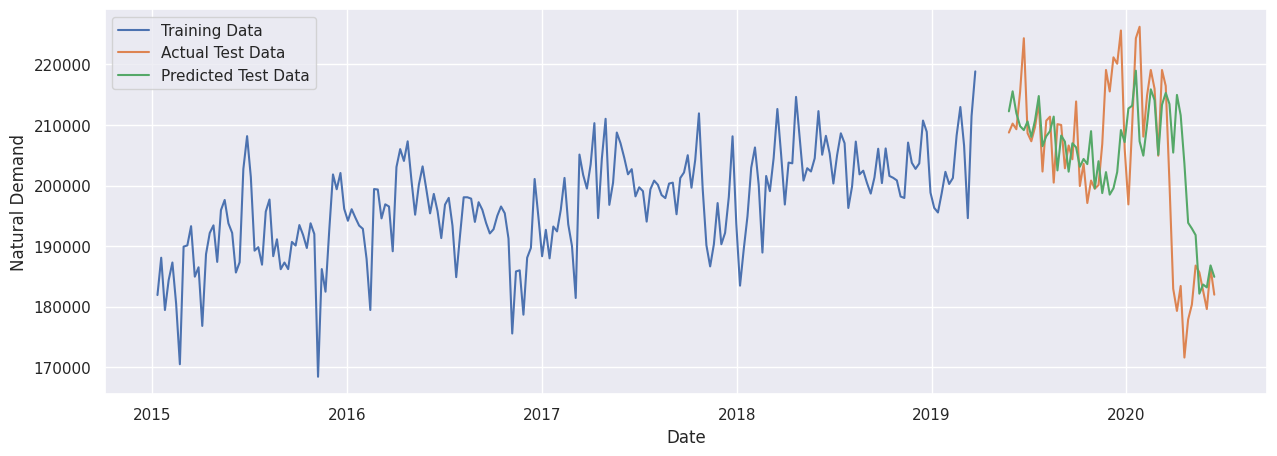

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your dataset
df_all = pd.read_csv("continuous dataset.csv", parse_dates=['datetime'], index_col=['datetime'])
df = df_all['nat_demand'].resample('W').sum()
df = df[1:-2]  # Removing pandemic effects
df = df.to_frame()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Convert the dataset into a supervised learning problem
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps - 3):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps:i + time_steps + 3, 0])
    return np.array(X), np.array(y)

# Set the time steps
time_steps = 5  # You can adjust this based on your data and problem

# Create the supervised learning dataset
X, y = create_dataset(df_scaled, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size, :], X[train_size:len(X), :]
y_train, y_test = y[0:train_size, :], y[train_size:len(y), :]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, time_steps)))
model.add(Dense(3))  # 3 for predicting the next 3 time stamp outputs
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to original scale
train_predict = scaler.inverse_transform(np.reshape(train_predict, (train_predict.shape[0], 3)))
test_predict = scaler.inverse_transform(np.reshape(test_predict, (test_predict.shape[0], 3)))

# Plot the results
plt.figure(figsize = [15,5])
plt.plot(df.index[:len(train_predict)], df['nat_demand'].values[:len(train_predict)], label='Training Data')
plt.plot(df.index[len(train_predict) + time_steps + 3:], df['nat_demand'].values[len(train_predict) + time_steps + 3:],
         label='Actual Test Data')
plt.plot(df.index[len(train_predict) + time_steps + 3:], test_predict[:, 0], label='Predicted Test Data')

plt.xlabel('Date')
plt.ylabel('Natural Demand')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df_all = pd.read_csv("continuous dataset.csv", parse_dates=['datetime'], index_col=['datetime'])
df = df_all['nat_demand'].resample('W').sum()
df = df[1:-2]  # Removing pandemic effects
df = df.to_frame()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Convert the dataset into a supervised learning problem
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps - 3):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps:i + time_steps + 3, 0])
    return np.array(X), np.array(y)

# Set the time steps
time_steps = 5  # You can adjust this based on your data and problem

# Create the supervised learning dataset
X, y = create_dataset(df_scaled, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size, :], X[train_size:len(X), :]
y_train, y_test = y[0:train_size, :], y[train_size:len(y), :]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, time_steps)))
model.add(Dense(3))  # 3 for predicting the next 3 time stamp outputs
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

# Make predictions using the model's own predictions
train_predict = []
test_predict = []

# Use the last time_steps values from the training set to make predictions iteratively
current_input = X_train[-1, :, :].reshape((1, 1, time_steps))

# Predict the next 3 time stamp outputs iteratively
for _ in range(len(X_test) + 3):
    current_prediction = model.predict(current_input)
    test_predict.append(current_prediction[0, 0])

    # Update input for the next prediction
    current_input = np.roll(current_input, -1, axis=2)
    current_input[0, 0, -1] = current_prediction[0, 0]

# Inverse transform the predictions to original scale
test_predict = scaler.inverse_transform(np.array(test_predict).reshape(-1, 1))

# Trim df.index to have the same length as test_predict
trimmed_index = df.index[len(train_predict) + time_steps + 3:len(train_predict) + time_steps + 3 + len(test_predict)]

Epoch 1/50
220/220 - 44s - loss: 0.0523 - 44s/epoch - 199ms/step
Epoch 2/50
220/220 - 1s - loss: 0.0135 - 548ms/epoch - 2ms/step
Epoch 3/50
220/220 - 0s - loss: 0.0135 - 496ms/epoch - 2ms/step
Epoch 4/50
220/220 - 1s - loss: 0.0134 - 536ms/epoch - 2ms/step
Epoch 5/50
220/220 - 1s - loss: 0.0134 - 685ms/epoch - 3ms/step
Epoch 6/50
220/220 - 1s - loss: 0.0137 - 716ms/epoch - 3ms/step
Epoch 7/50
220/220 - 1s - loss: 0.0132 - 729ms/epoch - 3ms/step
Epoch 8/50
220/220 - 1s - loss: 0.0134 - 773ms/epoch - 4ms/step
Epoch 9/50
220/220 - 1s - loss: 0.0133 - 762ms/epoch - 3ms/step
Epoch 10/50
220/220 - 1s - loss: 0.0133 - 733ms/epoch - 3ms/step
Epoch 11/50
220/220 - 1s - loss: 0.0134 - 763ms/epoch - 3ms/step
Epoch 12/50
220/220 - 1s - loss: 0.0134 - 754ms/epoch - 3ms/step
Epoch 13/50
220/220 - 1s - loss: 0.0129 - 736ms/epoch - 3ms/step
Epoch 14/50
220/220 - 1s - loss: 0.0132 - 652ms/epoch - 3ms/step
Epoch 15/50
220/220 - 0s - loss: 0.0129 - 480ms/epoch - 2ms/step
Epoch 16/50
220/220 - 1s - loss: 

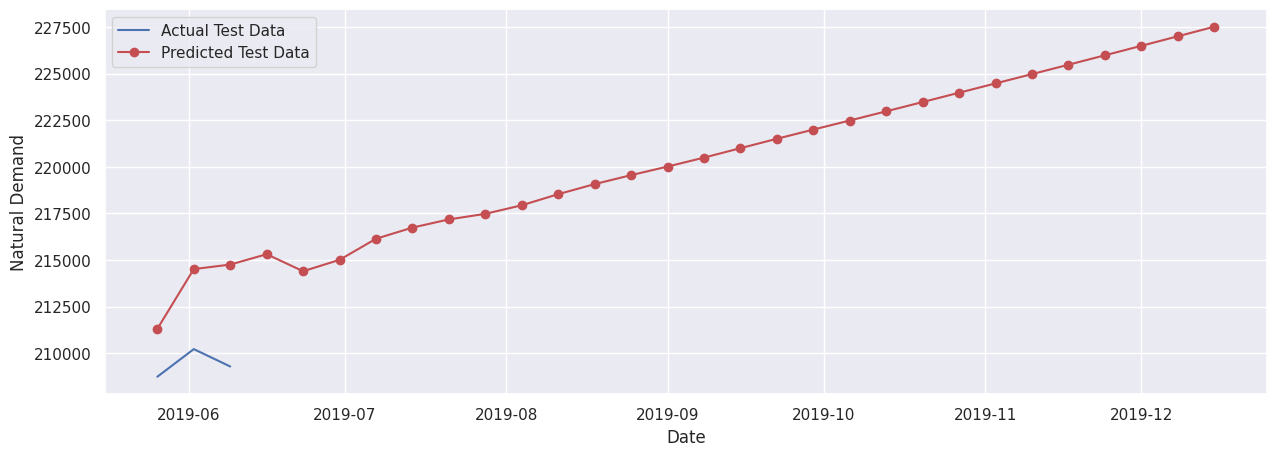

In [ ]:
trimmed_index = df.index[len(X_train) + time_steps + 3:len(X_train) + time_steps + 33]  # Adjusted range
trimmed_test_predict = test_predict[:30]  # Adjusted range

# Plot the results
plt.figure(figsize=[15, 5])
plt.plot(df.index[len(X_train) + time_steps + 3:len(X_train) + time_steps + 6],
         df['nat_demand'].values[len(X_train) + time_steps + 3:len(X_train) + time_steps + 6],
         label='Actual Test Data')
plt.plot(trimmed_index, trimmed_test_predict, marker='o', linestyle='-', color='r', label='Predicted Test Data')  # Adjusted range

plt.xlabel('Date')
plt.ylabel('Natural Demand')
plt.legend()
plt.show()

Epoch 1/50
220/220 - 2s - loss: 0.0230 - 2s/epoch - 9ms/step
Epoch 2/50
220/220 - 1s - loss: 0.0138 - 642ms/epoch - 3ms/step
Epoch 3/50
220/220 - 1s - loss: 0.0138 - 597ms/epoch - 3ms/step
Epoch 4/50
220/220 - 1s - loss: 0.0137 - 575ms/epoch - 3ms/step
Epoch 5/50
220/220 - 1s - loss: 0.0134 - 608ms/epoch - 3ms/step
Epoch 6/50
220/220 - 1s - loss: 0.0137 - 583ms/epoch - 3ms/step
Epoch 7/50
220/220 - 1s - loss: 0.0135 - 690ms/epoch - 3ms/step
Epoch 8/50
220/220 - 1s - loss: 0.0133 - 940ms/epoch - 4ms/step
Epoch 9/50
220/220 - 1s - loss: 0.0137 - 1s/epoch - 5ms/step
Epoch 10/50
220/220 - 1s - loss: 0.0135 - 880ms/epoch - 4ms/step
Epoch 11/50
220/220 - 1s - loss: 0.0130 - 1s/epoch - 6ms/step
Epoch 12/50
220/220 - 1s - loss: 0.0132 - 1s/epoch - 5ms/step
Epoch 13/50
220/220 - 1s - loss: 0.0130 - 758ms/epoch - 3ms/step
Epoch 14/50
220/220 - 1s - loss: 0.0130 - 555ms/epoch - 3ms/step
Epoch 15/50
220/220 - 0s - loss: 0.0134 - 488ms/epoch - 2ms/step
Epoch 16/50
220/220 - 0s - loss: 0.0129 - 357m

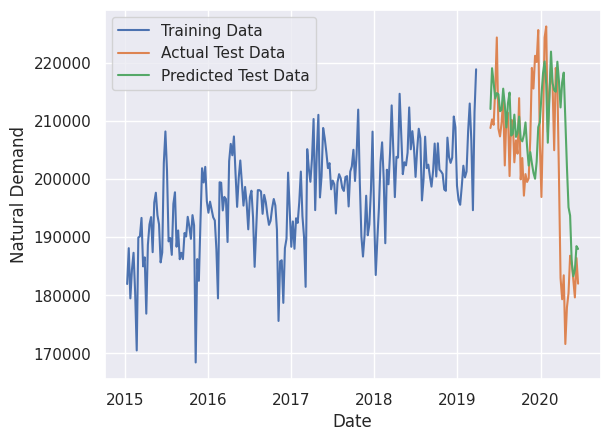

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt

# Load your dataset
df_all = pd.read_csv("continuous dataset.csv", parse_dates=['datetime'], index_col=['datetime'])
df = df_all['nat_demand'].resample('W').sum()
df = df[1:-2]  # Removing pandemic effects
df = df.to_frame()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Convert the dataset into a supervised learning problem
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps - 3):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps:i + time_steps + 3, 0])
    return np.array(X), np.array(y)

# Set the time steps
time_steps = 5  # You can adjust this based on your data and problem

# Create the supervised learning dataset
X, y = create_dataset(df_scaled, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size, :], X[train_size:len(X), :]
y_train, y_test = y[0:train_size, :], y[train_size:len(y), :]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(3))  # 3 for predicting the next 3 time stamp outputs
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to original scale
train_predict = scaler.inverse_transform(np.reshape(train_predict, (train_predict.shape[0], 3)))
test_predict = scaler.inverse_transform(np.reshape(test_predict, (test_predict.shape[0], 3)))

# Plot the results
plt.plot(df.index[:len(train_predict)], df['nat_demand'].values[:len(train_predict)], label='Training Data')
plt.plot(df.index[len(train_predict) + time_steps + 3:], df['nat_demand'].values[len(train_predict) + time_steps + 3:],
         label='Actual Test Data')
plt.plot(df.index[len(train_predict) + time_steps + 3:], test_predict[:, 0], label='Predicted Test Data')

plt.xlabel('Date')
plt.ylabel('Natural Demand')
plt.legend()
plt.show()


In [ ]:
data = np.array(df)

datetime
2015-01-11   NaN
2015-01-18   NaN
2015-01-25   NaN
2015-02-01   NaN
2015-02-08   NaN
              ..
2020-05-17   NaN
2020-05-24   NaN
2020-05-31   NaN
2020-06-07   NaN
2020-06-14   NaN
Freq: W-SUN, Name: trend, Length: 284, dtype: float64
datetime
2015-01-11   -7049.779837
2015-01-18   -7353.545498
2015-01-25   -4323.911396
2015-02-01   -1850.728280
2015-02-08   -1921.447662
                 ...     
2020-05-17    5909.220071
2020-05-24    4087.113679
2020-05-31    4710.769739
2020-06-07    2714.941176
2020-06-14    4441.118683
Freq: W-SUN, Name: seasonal, Length: 284, dtype: float64


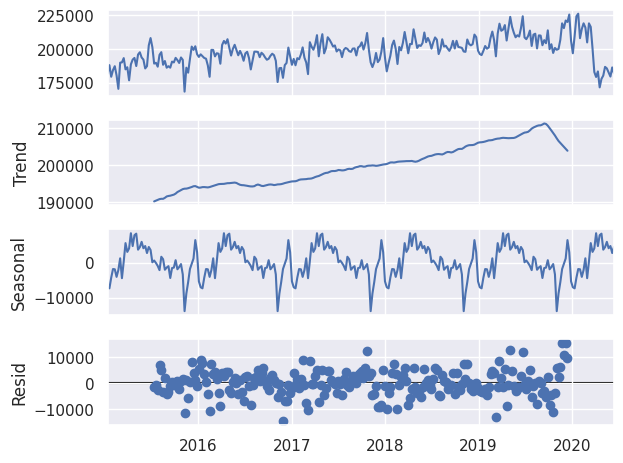

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = df
result = seasonal_decompose(df, model='additive')
print(result.trend)
print(result.seasonal)
result.plot()
plt.show()

## ARIMA

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data.reshape(-1), test_size=0.2, shuffle=False)
data_train, data_test = pd.Series(data_train), pd.Series(data_test)

### Check Stationarity

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

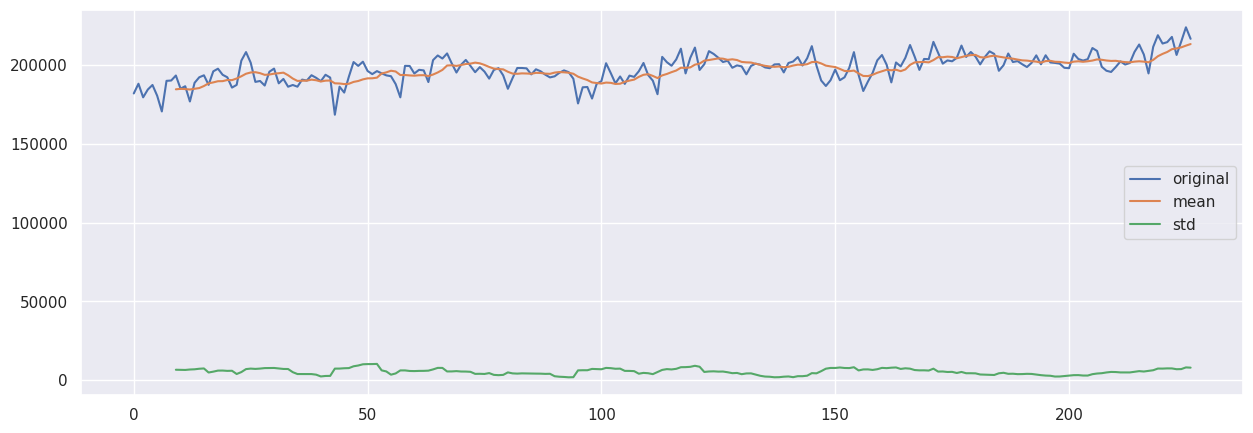

In [ ]:
# Rolling Average Test
roll_mean = data_train.rolling(window=10).mean()
roll_std = data_train.rolling(window=10).std()
plt.figure(figsize=(15, 5))
plt.plot(data_train , label='original')
plt.plot(roll_mean, label='mean')
plt.plot(roll_std, label='std')
plt.legend()
plt.show()

In [ ]:
data_diff = data_train- data_train.shift(1)
data_diff.head()

0          NaN
1    6162.6928
2   -8633.5968
3    4944.7072
4    2896.7590
dtype: float64

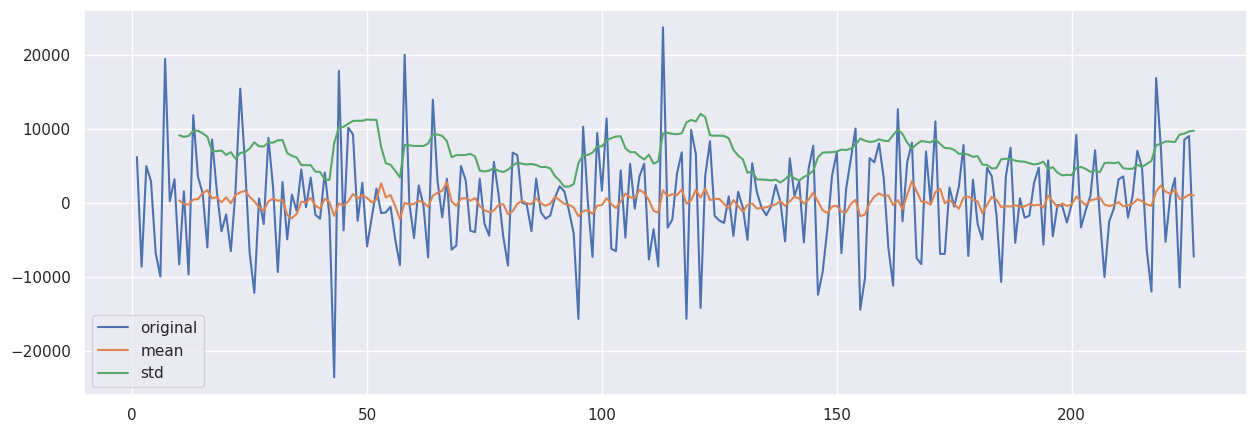

In [ ]:
# Rolling Average Test
roll_mean = data_diff.rolling(window=10).mean()
roll_std = data_diff.rolling(window=10).std()
plt.figure(figsize=(15, 5))
plt.plot(data_diff, label='original')
plt.plot(roll_mean, label='mean')
plt.plot(roll_std, label='std')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
ad = adfuller(data_diff.dropna(), autolag='AIC')
names = ['adf', 'pvalue', 'used_lags', 'nobs', 'critical_values']
for x, y in zip(names, ad):
    print(f'{x}: {y}')

adf: -11.78327336018284
pvalue: 1.0228431563218138e-21
used_lags: 4
nobs: 221
critical_values: {'1%': -3.4602906385073884, '5%': -2.874708679520702, '10%': -2.573788599127782}


### PACF and ACF

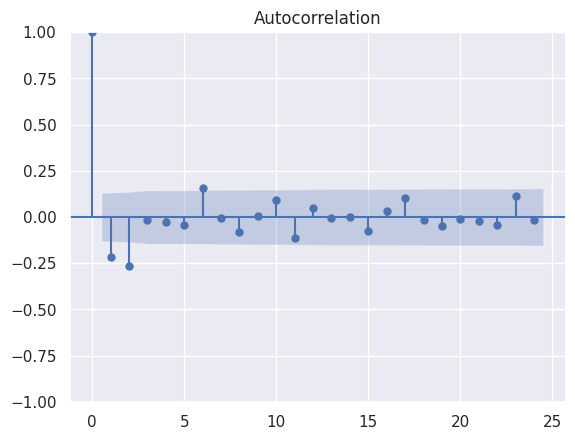

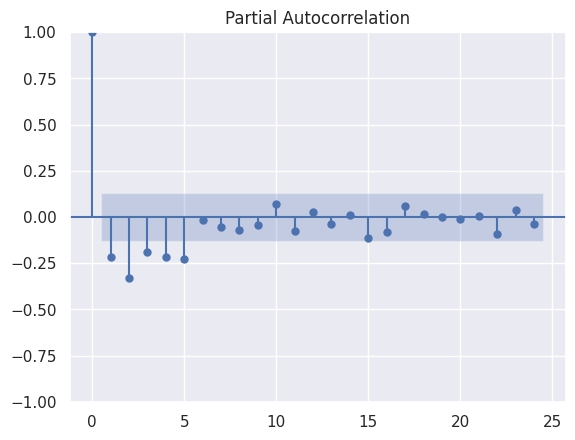

In [ ]:
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ppacf = pacf(data_diff.dropna(), nlags=40)
aacf = acf(data_diff.dropna(), nlags=40)

plot_acf(data_diff.dropna())
plot_pacf(data_diff.dropna())
plt.show()

### Training

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_train, order=(5, 1, 2))
results = model.fit()
pred = results.fittedvalues
data_train_pred = pd.Series(pred)
data_train_pred

0           0.000000
1      175080.794359
2      168687.408955
3      179297.957841
4      181952.328303
           ...      
222    215590.559038
223    217007.773364
224    205518.925467
225    215545.887498
226    223287.599389
Length: 227, dtype: float64

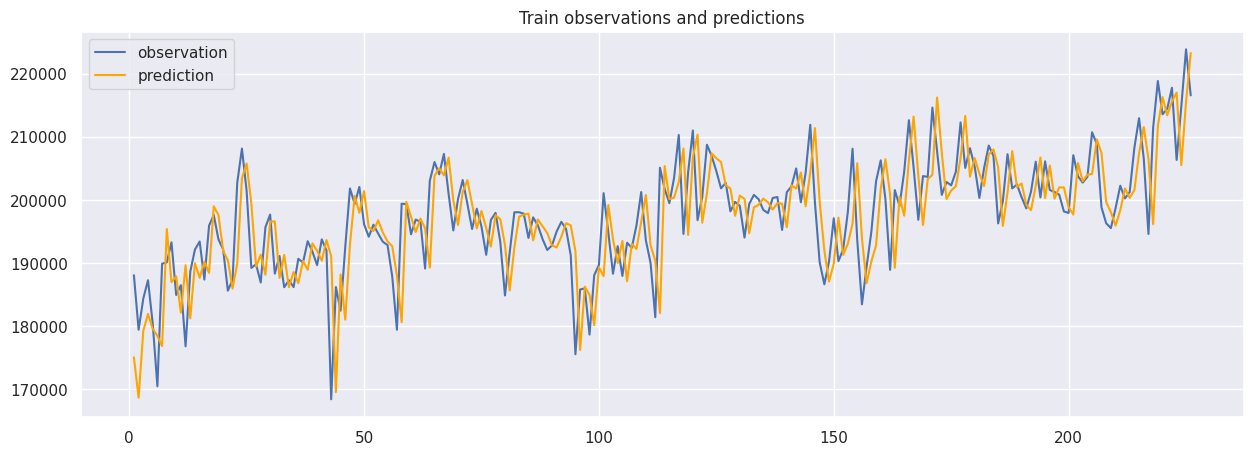

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(data_train[1:], label='observation')
plt.plot(data_train_pred[1:], c='orange', label='prediction')
plt.title('Train observations and predictions')
plt.legend()
plt.show()

### Prediction

#### Single Step

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

history = [x for x in data_train]
predictions_single = []
for i in range(len(data_test)):
    model = ARIMA(history, order=(5, 1, 2))
    results = model.fit()
    output = results.forecast()
    res = output[0]
    predictions_single.append(res)
    obs = data_test[i]
    history.append(obs)
    if i % 20 == 0:
        print(f'Iteration: {i} | Predicted: {res:.3f} | Expected: {obs:.3f}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Iteration: 0 | Predicted: 212025.226 | Expected: 212171.505
Iteration: 20 | Predicted: 210136.442 | Expected: 199917.763
Iteration: 40 | Predicted: 215970.575 | Expected: 216005.188


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
rmse = math.sqrt(mean_squared_error(data_test, predictions_single))
mae = mean_absolute_error(data_test, predictions_single)
mse = mean_squared_error(data_test, predictions_single)

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSE: {mse:.3f}')

Test RMSE: 8408.043
Test MAE: 6600.957
Test MSE: 70695195.494


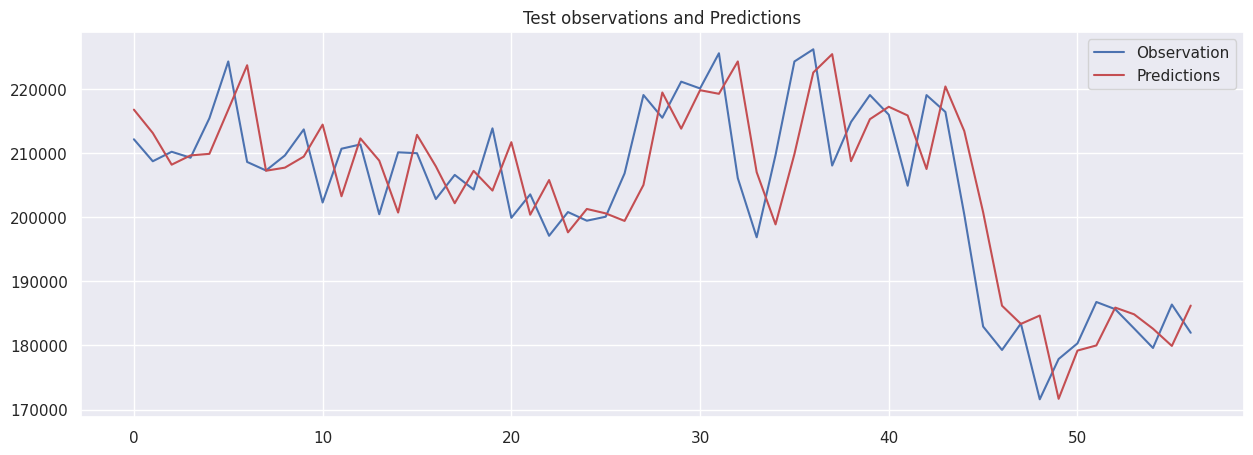

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(data_test, label='Observation')
plt.plot(predictions_single, c='r', label='Predictions')
plt.title('Test observations and Predictions')
plt.legend()
plt.show()

#### Multistep

In [ ]:
from sklearn.metrics import mean_squared_error
import math

history = [x for x in data_train]
predictions_multiple = []
sstep = 2

for i in range(0, len(data_test), sstep):
    model = ARIMA(history, order=(3, 1, 2))
    results = model.fit()
    if i+sstep-1 < len(data_test):
        output = results.forecast(sstep)
        predictions_multiple.extend(output)
        obs = list(data_test[i:i+sstep])
        history.extend(obs)
    else:
        output = results.forecast(len(data_test) - i)
        predictions_multiple.extend(output)
        obs = list(data_test[i:len(data_test) - i])
        history.append(obs)
    if i % 20 == 0:
        print(f'Iteration: {i} | Predicted: {output} | Expected: {obs}')

Iteration: 0 | Predicted: [215964.06126958 216697.06797205] | Expected: [212171.505, 208743.115725]
Iteration: 20 | Predicted: [213747.1897192 212630.1624234] | Expected: [199917.7632, 203579.3738]
Iteration: 40 | Predicted: [218202.00113413 217777.27947878] | Expected: [216005.1882, 204924.9816]


In [ ]:
rmse = math.sqrt(mean_squared_error(data_test, predictions_multiple))
mae = mean_absolute_error(data_test, predictions_multiple)
mse = mean_squared_error(data_test, predictions_multiple)

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSE: {mse:.3f}')

Test RMSE: 10505.855
Test MAE: 8024.933
Test MSE: 110372998.092


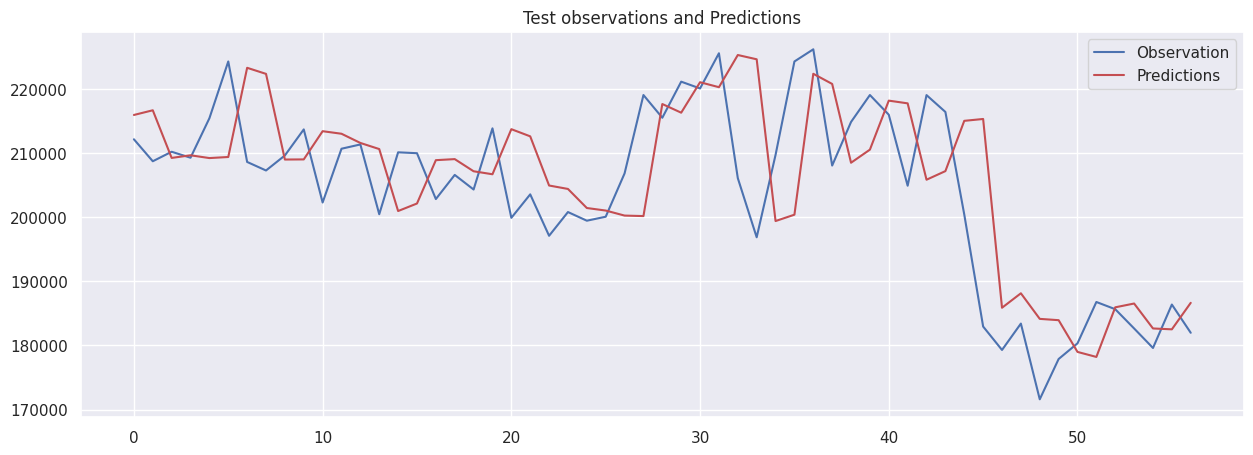

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(list(data_test), label='Observation')
plt.plot(predictions_multiple, c='r', label='Predictions')
plt.title('Test observations and Predictions')
plt.legend()
plt.show()

## LSTM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

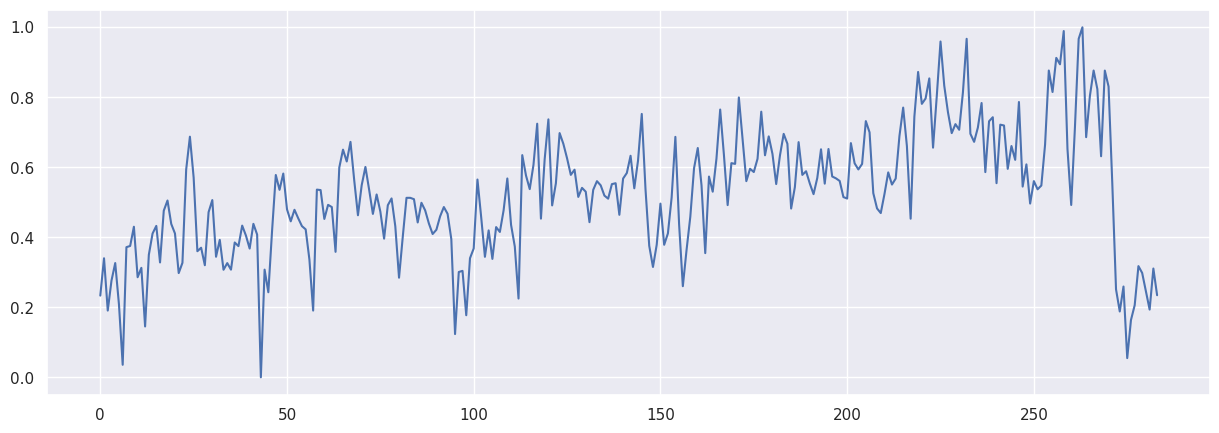

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = data.reshape(-1,1)
dataset = scaler.fit_transform(data)
plt.figure(figsize=(15, 5))
plt.plot(dataset)
plt.show()

### 1 step

In [ ]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

227 57


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX, trainY = np.expand_dims(trainX, axis=1), np.expand_dims(trainY, axis=1)
testX, testY = np.expand_dims(testX, axis=1), np.expand_dims(testY, axis=1)

In [ ]:
from keras.layers import LSTM, Dense, Dropout

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, look_back)))
# model.add(Dense(units=4, activation='relu'))  # Adjust activation function based on your problem
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, verbose=0)

In [ ]:
trainPredict = model.predict(trainX)

7/7 [==============================] - 0s 3ms/step


In [ ]:
trainPredict_var = scaler.inverse_transform(trainPredict)
trainY_var = scaler.inverse_transform(trainY)

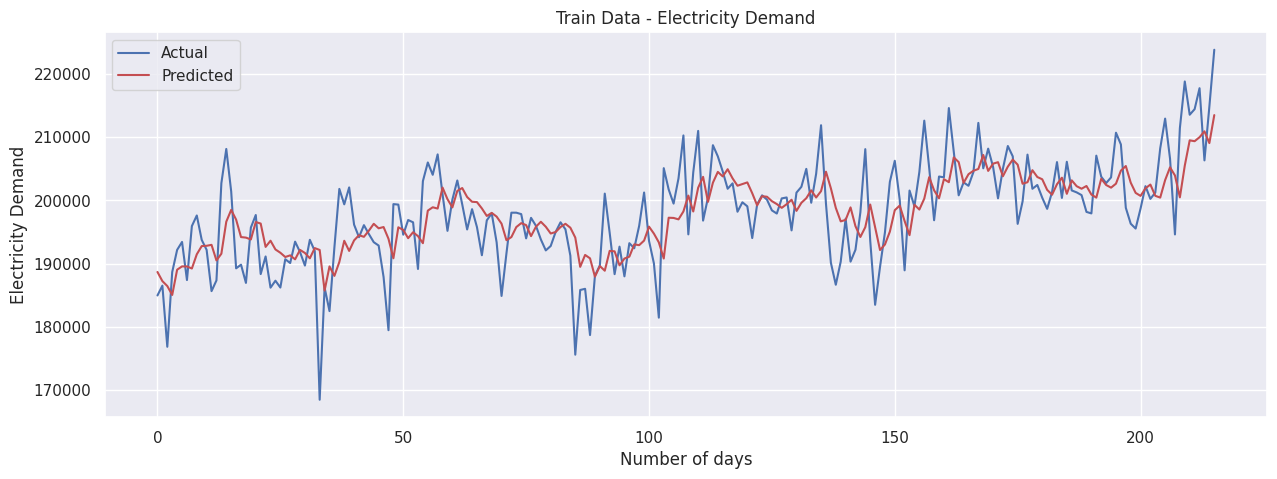

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(trainY_var, label='Actual')
plt.plot(trainPredict_var, color='r', label='Predicted')

# Additional code for customization (if needed)
plt.legend()
plt.title('Train Data - Electricity Demand')
plt.xlabel('Number of days')
plt.ylabel('Electricity Demand')

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import math

hstry = trainX.copy()
pred_lstm_single = []
observation_lstm_single = []


for ttest, ttest_y in zip(testX, testY):
    ttest = ttest.reshape(1, ttest.shape[0], ttest.shape[1])
    prediction = model.predict(ttest, verbose=0)

    pred_lstm_single.append(prediction[0][0])
    observation_lstm_single.append(ttest_y)

    model.fit(ttest, ttest_y, epochs=100, verbose=0)

In [ ]:
testPredict_var = scaler.inverse_transform([pred_lstm_single]).T
testY_var = scaler.inverse_transform(testY)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

rmse = math.sqrt(mean_squared_error(testY_var, testPredict_var))
mae = mean_absolute_error(testY_var, testPredict_var)
mse = mean_squared_error(testY_var, testPredict_var)
mape = mean_absolute_percentage_error(testY_var, testPredict_var)

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSE: {mse:.3f}')
print(f'Test MAPE: {mape:.3f}')

Test RMSE: 9250.669
Test MAE: 7590.978
Test MSE: 85574877.282
Test MAPE: 0.037


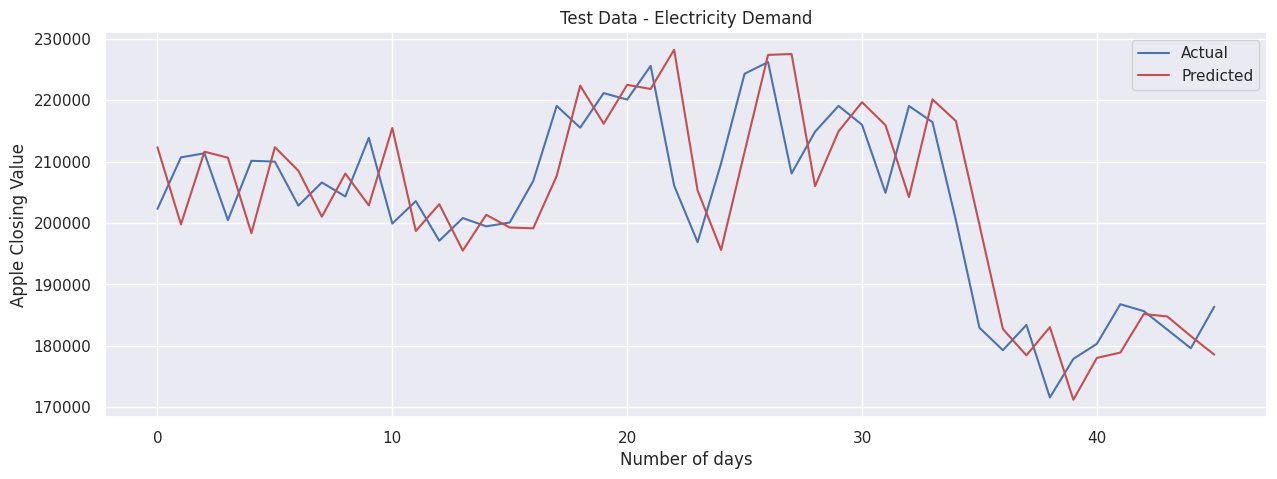

In [ ]:
# plt.figure(figsize=(15, 5))
# plt.plot(testY_var)
# plt.plot(testPredict_var)
plt.figure(figsize=(15, 5))
plt.plot(testY_var, label='Actual')
plt.plot(testPredict_var, color='r', label='Predicted')

# Additional code for customization (if needed)
plt.legend()
plt.title('Test Data - Electricity Demand')
plt.xlabel('Number of days')
plt.ylabel('Apple Closing Value')

# Show the plot
plt.show()

### Multistep

In [ ]:
np.random.seed(42)
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

227 57


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX, trainY = np.expand_dims(trainX, axis=1), np.expand_dims(trainY, axis=1)
testX, testY = np.expand_dims(testX, axis=1), np.expand_dims(testY, axis=1)

In [ ]:
from keras.layers import LSTM, Dense, Dropout

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, look_back)))
# model.add(Dense(units=4, activation='relu'))  # Adjust activation function based on your problem
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, verbose=0)

In [ ]:
def predict_n_step(model, X, n, n_steps):
  X1 = np.transpose(X, (0, 2, 1))
  yp = []

  for i in range(X1.shape[0]):
    if(i%n <= n_steps):
      yp.append( model.predict( np.append(X1[i][0:n_steps-(i%n)], yp[len(yp)-(i%n):len(yp)]).reshape(1,1,n_steps), verbose=0)[0][0] )
    else:
      yp.append( model.predict( np.array(yp[-n_steps:]).reshape(1,1,n_steps), verbose=0)[0][0] )

  return yp

In [ ]:
from sklearn.metrics import mean_squared_error
import math

hstry = trainX.copy()
predictions_multiple = []
observation_lstm_single = []
sstep = 5

for i in range(0, len(testX), sstep):
    print(i)
    if i + sstep - 1 < len(testX):
        output = predict_n_step(model, testX[i:i+sstep], sstep, look_back)
        predictions_multiple.extend(output)
        obs = np.array(testY[i:i+sstep])
        # hstry = np.concatenate(hstry, np.array(obs))

        model.fit(testX[i: i+sstep], testY[i:i+sstep], epochs=30, verbose=0)
    else:
        output = predict_n_step(model, testX[i:len(testX)], sstep, look_back)
        predictions_multiple.extend(output)
        obs = list(testY[i:len(testY)])
        # hstry = np.concatenate(hstry, np.array(obs))

        model.fit(testX[i:len(testX)], testY[i:len(testY)], epochs=30, verbose=0)

    if i % 5 == 0:
        print(f'Iteration: {i} | Predicted: {output} | Expected: {obs}')

0
Iteration: 0 | Predicted: [0.7656179, 0.7565734, 0.71956784, 0.69264036, 0.7085945] | Expected: [[0.58629262]
 [0.73152751]
 [0.74307398]
 [0.55466284]
 [0.72183498]]
5
Iteration: 5 | Predicted: [0.69057924, 0.6231862, 0.6243907, 0.6375438, 0.6008848] | Expected: [[0.71945422]
 [0.59561908]
 [0.6608225 ]
 [0.62138579]
 [0.78657334]]
10
Iteration: 10 | Predicted: [0.7002924, 0.6958926, 0.6864421, 0.66316026, 0.6790585] | Expected: [[0.54494859]
 [0.60832108]
 [0.49643924]
 [0.56055339]
 [0.53716196]]
15
Iteration: 15 | Predicted: [0.50837374, 0.4863715, 0.46149936, 0.45555097, 0.4481098] | Expected: [[0.54791926]
 [0.66489589]
 [0.87653336]
 [0.81517966]
 [0.91263066]]
20
Iteration: 20 | Predicted: [0.88124055, 0.89086723, 0.9234993, 0.9746224, 1.0105217] | Expected: [[0.89428519]
 [0.98930561]
 [0.65210529]
 [0.49239804]
 [0.7148229 ]]
25
Iteration: 25 | Predicted: [0.6929946, 0.7135936, 0.7612081, 0.7683989, 0.76406336] | Expected: [[0.96712936]
 [1.        ]
 [0.68611058]
 [0.80378

In [ ]:
testPredict_var = scaler.inverse_transform([predictions_multiple]).T
testY_var = scaler.inverse_transform(testY)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

rmse = math.sqrt(mean_squared_error(testY_var, testPredict_var))
mae = mean_absolute_error(testY_var, testPredict_var)
mse = mean_squared_error(testY_var, testPredict_var)
mape = mean_absolute_percentage_error(testY_var, testPredict_var)

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSE: {mse:.3f}')
print(f'Test MAPE: {mape:.3f}')

Test RMSE: 14530.482
Test MAE: 11053.049
Test MSE: 211134911.141
Test MAPE: 0.056


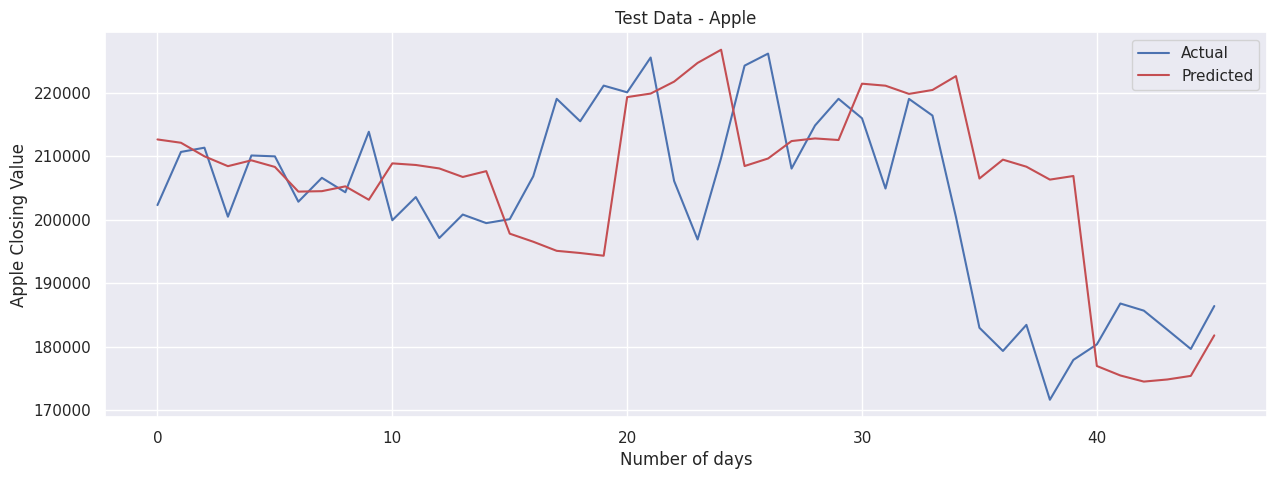

In [ ]:
# plt.figure(figsize=(15, 5))
# plt.plot(testY_var)
# plt.plot(testPredict_var)
plt.figure(figsize=(15, 5))
plt.plot(testY_var, label='Actual')
plt.plot(testPredict_var, color='r', label='Predicted')

# Additional code for customization (if needed)
plt.legend()
plt.title('Test Data - Apple')
plt.xlabel('Number of days')
plt.ylabel('Apple Closing Value')

# Show the plot
plt.show()